# 2_1 SVM 

In [4]:
import sys, os
from pathlib import Path

# Add src vào sys.path
repo_root = Path.cwd().resolve().parents[0] if (Path.cwd().name == 'notebook') else Path.cwd().resolve()
src_path = repo_root / 'src'
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

print('Repo root:', repo_root)
print('SRC path:', src_path)

Repo root: C:\Users\HAD\Desktop\Machine Learning\Weather-type-prediction-on-tabular-dataset
SRC path: C:\Users\HAD\Desktop\Machine Learning\Weather-type-prediction-on-tabular-dataset\src


Kernel Python: c:\Users\HAD\Desktop\Machine Learning\.venv\Scripts\python.exe
Python version: 3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]
Repo root: C:\Users\HAD\Desktop\Machine Learning\Weather-type-prediction-on-tabular-dataset
SRC path: C:\Users\HAD\Desktop\Machine Learning\Weather-type-prediction-on-tabular-dataset\src
Training classifier for class 0...
Training classifier for class 1...
Training classifier for class 2...
Training classifier for class 3...

Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.79      0.83      0.81       660
       Rainy       0.83      0.83      0.83       660
       Snowy       0.86      0.91      0.89       660
       Sunny       0.92      0.83      0.87       660

    accuracy                           0.85      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.85      0.85      2640

Accuracy: 0.8492


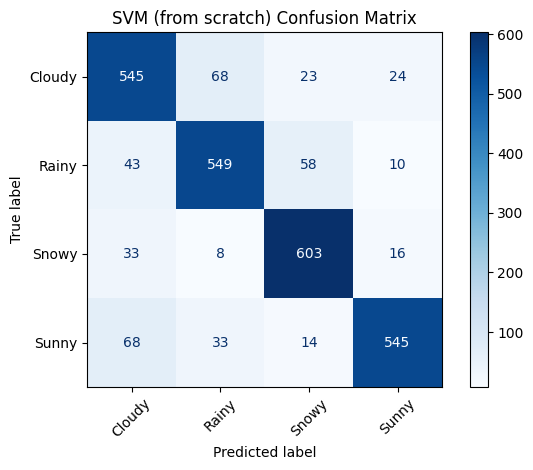

Accuracy: 0.8492


In [1]:

import sys, os, subprocess, importlib, site
from pathlib import Path

print("Kernel Python:", sys.executable)
print("Python version:", sys.version)

try:
    user_site = site.getusersitepackages()
    if user_site and user_site not in sys.path:
        sys.path.append(user_site)
except Exception:
    pass

def ensure_import(pkg, import_name=None):
    name = import_name or pkg
    try:
        return importlib.import_module(name)
    except ModuleNotFoundError:
        print(f"[setup] Installing {pkg} into current kernel...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "--user", pkg])

        try:
            site.main()
        except Exception:
            pass
        try:
            user_site = site.getusersitepackages()
            if user_site and user_site not in sys.path:
                sys.path.append(user_site)
        except Exception:
            pass
        return importlib.import_module(name)

ensure_import("numpy")
ensure_import("pandas")
ensure_import("matplotlib")
ensure_import("seaborn")
ensure_import("scikit-learn", "sklearn")

cwd = Path.cwd().resolve()
if cwd.name == "notebook":
    repo_root = cwd.parent
else:
    cur = cwd
    while cur != cur.parent and not (cur / "src").exists():
        cur = cur.parent
    repo_root = cur

src_path = repo_root / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

print("Repo root:", repo_root)
print("SRC path:", src_path)

from train_svm1 import train_svm_scratch 
data_path = repo_root / "data" / "raw" / "weather_classification_data.csv"
assert data_path.exists(), f"Data not found: {data_path}"

result = train_svm_scratch(data_path=data_path, plot=True)
print(f"Accuracy: {result.accuracy:.4f}")